<a href="https://colab.research.google.com/github/heizsen/Ai/blob/main/Azis_ANNAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network Landscape

Today mentoring session, we will learn about:


* Simple model of biological neuron
* Perceptron
* NN Structure and elements
* Network for classification



## Setup

In [ ]:
# Python ≥3.5 is required
import sys


# Scikit-Learn ≥0.20 is required
import sklearn


import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Perceptrons

Perceptron take a weighted summation of inputs, and apply an activation function to produce the output. Simplistically, we can think Perceptron unit as a Logistic classifier.

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

For this experiment, we use the Iris dataset and convert it into a binary classifier.

In [ ]:
# import numpy as np
# from sklearn.datasets import load_iris
# from sklearn.linear_model import Perceptron

# iris = load_iris()
# X = iris.data[:, (2, 3)]  # petal length, petal width
# y = (iris.target == 0).astype(np.int)

# per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
# per_clf.fit(X, y)

# #y_pred = per_clf.predict([[2, 0.5]])

In [ ]:
#y_pred

In [ ]:
# a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
# b = -per_clf.intercept_ / per_clf.coef_[0][1]

# axes = [0, 5, 0, 2]

# x0, x1 = np.meshgrid(
#         np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
#         np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
#     )
# X_new = np.c_[x0.ravel(), x1.ravel()]
# y_predict = per_clf.predict(X_new)
# zz = y_predict.reshape(x0.shape)

# plt.figure(figsize=(10, 4))
# plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
# plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

# plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
# from matplotlib.colors import ListedColormap
# custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

# plt.contourf(x0, x1, zz, cmap=custom_cmap)
# plt.xlabel("Petal length", fontsize=14)
# plt.ylabel("Petal width", fontsize=14)
# plt.legend(loc="lower right", fontsize=14)
# plt.axis(axes)

# plt.show()

## ANN Structure and Elements

Artificial Neural Network (ANN or simply called NN) is a mathematical model that tries to mimic how brain works. It is a further development of perceptron, where NN consist of perceptrons stacked together into a layer, and multiple layers are cascaded sequentially to build a network.

### Network Architecture

Network Architecture define how the layers and the neurons are constructed in our network.

### Activation functions

Activation function is an important part of neural network. Activation function enable us to introduce non-linearity to the model, and as we already learned that non-linearity enable more complex with better capacity to learn.

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

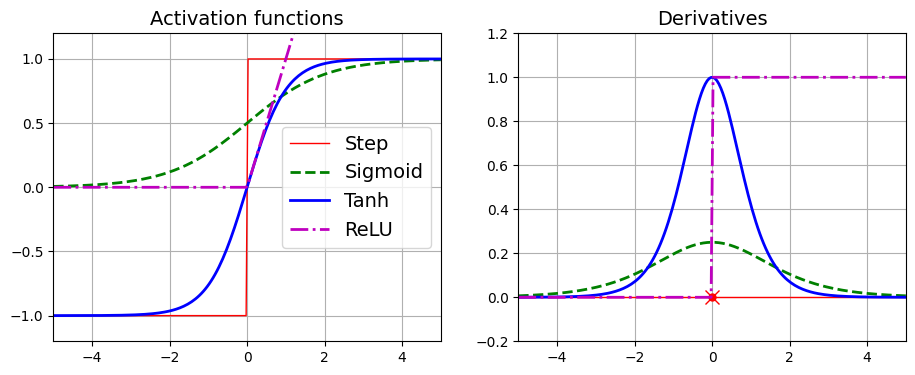

In [ ]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

#save_fig("activation_functions_plot")
plt.show()

Sigmoid activation function is intended to mimic the Heaviside function in a derivable function.

In [ ]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

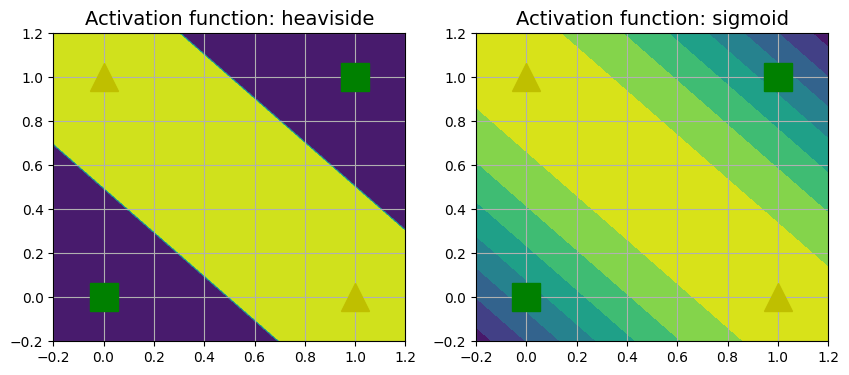

In [ ]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

Now, let's try to create a network that we can use as image classifier.

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
# keras.__version__

The second version is the version of the Keras API implemented by tf.keras. Note that
it ends with -tf, highlighting the fact that tf.keras implements the Keras API, plus
some extra TensorFlow-specific features.

Now let’s use tf.keras! We’ll start by building a simple image classifier.

## Building an Image Classifier Using the Sequential API

First, we need to load a dataset. In this chapter we will tackle Fashion MNIST, which
is a drop-in replacement of MNIST. It has the exact same
format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes),
but the images represent fashion items rather than handwritten digits, so each class is
more diverse, and the problem turns out to be significantly more challenging than
MNIST. For example, a simple linear model reaches about 92% accuracy on MNIST,
but only about 83% on Fashion MNIST.

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, one
important difference is that every image is represented as a 28 × 28 array rather than
a 1D array of size 784. Moreover, the pixel intensities are represented as integers
(from 0 to 255) rather than floats (from 0.0 to 255.0). Let’s take a look at the shape
and data type of the training set:

In [ ]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

Note that the dataset is already split into a training set and a test set, but there is no
validation set, so we’ll create one now. Additionally, since we are going to train the
neural network using Gradient Descent, we must scale the input features. For simplic‐
ity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0
(this also converts them to floats):

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

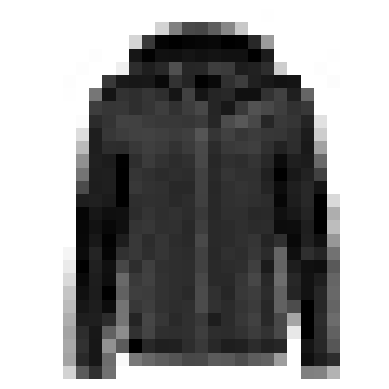

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [ ]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

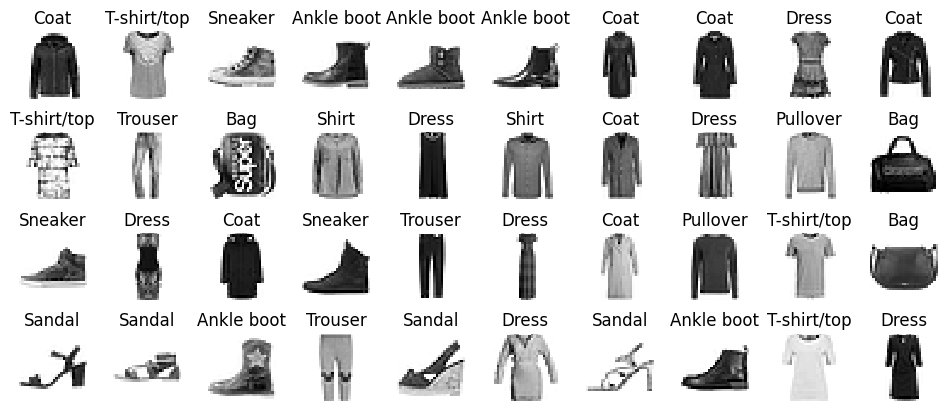

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Creating the model using the Sequential API

Now let’s build the neural network! Here is a classification MLP with two hidden
layers:

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Let’s go through this code line by line:

- The first line creates a Sequential model. This is the simplest kind of Keras
model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the Sequential API.
- Next, we build the first layer and add it to the model. It is a Flatten layer whose
role is to convert each input image into a 1D array: if it receives input data X, it
computes X.reshape(-1, 1). This layer does not have any parameters; it is just
there to do some simple preprocessing. Since it is the first layer in the model, you
should specify the input_shape, which doesn’t include the batch size, only the
shape of the instances. Alternatively, you could add a keras.layers.InputLayer
as the first layer, setting input_shape=[28,28].
- Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the
connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron).
- Then we add a second Dense hidden layer with 100 neurons, also using the ReLU
activation function.
- Finally, we add a Dense output layer with 10 neurons (one per class), using the
softmax activation function (because the classes are exclusive).

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Instead of adding the layers one by one as we just did, you can pass a list of layers
when creating the Sequential model:

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.layers

The model’s summary() method displays all the model’s layers, including each layer’s
name (which is automatically generated unless you set it when creating the layer), its
output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and
non-trainable parameters. Here we only have trainable parameters.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Note that Dense layers often have a lot of parameters. For example, the first hidden
layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to
235,500 parameters! This gives the model quite a lot of flexibility to fit the training
data, but it also means that the model runs the risk of overfitting, especially when you
do not have a lot of training data.

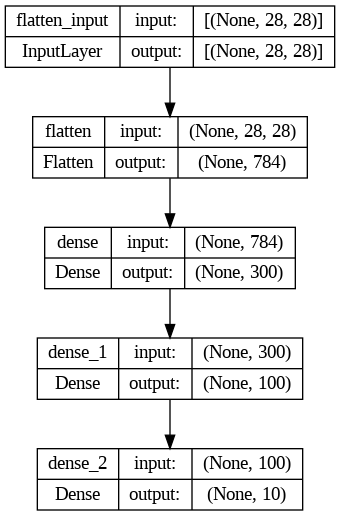

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[-0.02105437, -0.02045951, -0.0308879 , ...,  0.0187247 ,
        -0.03926735, -0.06383111],
       [ 0.04671413, -0.06577714,  0.03087325, ..., -0.0237131 ,
        -0.02920699, -0.0502747 ],
       [-0.03205087,  0.01331197,  0.02851002, ..., -0.05284371,
         0.05304509,  0.03264046],
       ...,
       [-0.00918113, -0.05186997,  0.02871485, ...,  0.04380438,
        -0.05173181,  0.06117149],
       [ 0.02130419, -0.02433511, -0.00825552, ...,  0.07407574,
         0.04070834,  0.00481428],
       [-0.02265825, -0.00060207,  0.01229662, ...,  0.01991519,
        -0.06999279, -0.0596372 ]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

## Compiling the model

After a model is created, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to
compute during training and evaluation:

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

This code requires some explanation. First, we use the "sparse_categorical_cross
entropy" loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we
had one target probability per class for each instance (such as one-hot vectors, e.g.
`[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]` to represent class 3), then we would
need to use the "categorical_crossentropy" loss instead. If we were doing binary
classification (with one or more binary labels), then we would use the "sigmoid" (i.e.,
logistic) activation function in the output layer instead of the "softmax" activation
function, and we would use the "binary_crossentropy" loss.

Regarding the optimizer, "sgd" means that we will train the model using simple Stochastic Gradient Descent. In other words, Keras will perform the backpropagation
algorithm described earlier (i.e., reverse-mode autodiff plus Gradient Descent).

Finally, since this is a classifier, it’s useful to measure its "accuracy" during training
and evaluation.

## Training and evaluating the model

Now the model is ready to be trained. For this we simply need to call its fit()
method:

In [ ]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7217 - accuracy: 0.7616 - val_loss: 0.5241 - val_accuracy: 0.8214
Epoch 2/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4883 - accuracy: 0.8291 - val_loss: 0.4371 - val_accuracy: 0.8496
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4422 - accuracy: 0.8452 - val_loss: 0.5397 - val_accuracy: 0.7968
Epoch 4/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4155 - accuracy: 0.8549 - val_loss: 0.3969 - val_accuracy: 0.8650
Epoch 5/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3975 - accuracy: 0.8612 - val_loss: 0.3785 - val_accuracy: 0.8700


We pass it the input features (X_train) and the target classes (y_train), as well as the
number of epochs to train (or else it would default to just 1, which would definitely
not be enough to converge to a good solution). We also pass a validation set (this is
optional). Keras will measure the loss and the extra metrics on this set at the end of
each epoch, which is very useful to see how well the model really performs. If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set (or there is a bug, such as a data mismatch
between the training set and the validation set).

And that’s it! The neural network is trained. At each epoch during training, Keras
displays the number of instances processed so far (along with a progress bar), the
mean training time per sample, and the loss and accuracy (or any other extra metrics
you asked for) on both the training set and the validation set. You can see that the
training loss went down, which is a good sign, and the validation accuracy reached
89.26% after 30 epochs. That’s not too far from the training accuracy, so there does
not seem to be much overfitting going on.

If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set the class_weight argument when
calling the fit() method, which would give a larger weight to underrepresented
classes and a lower weight to overrepresented classes. These weights would be used by
Keras when computing the loss. If you need per-instance weights, set the sam
ple_weight argument (if both class_weight and sample_weight are provided, Keras
multiplies them). Per-instance weights could be useful if some instances were labeled
by experts while others were labeled using a crowdsourcing platform: you might want
to give more weight to the former. You can also provide sample weights (but not class
weights) for the validation set by adding them as a third item in the validation_data
tuple.

In [ ]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

The fit() method returns a History object containing the training parameters
(history.params), the list of epochs it went through (history.epoch), and most
importantly a dictionary (history.history) containing the loss and extra metrics it
measured at the end of each epoch on the training set and on the validation set (if
any). If you use this dictionary to create a pandas DataFrame and call its plot()
method,

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

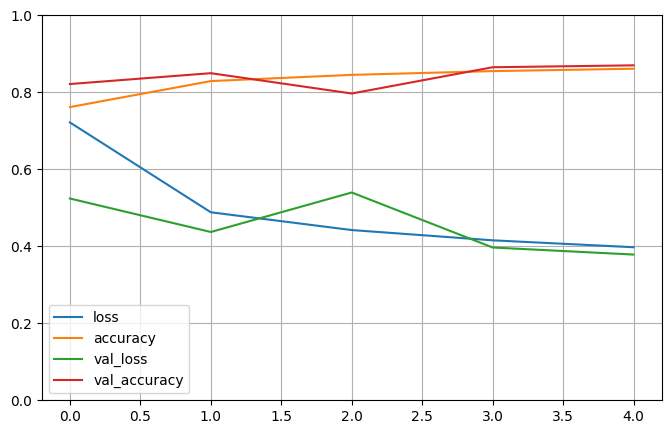

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

You can see that both the training accuracy and the validation accuracy steadily
increase during training, while the training loss and the validation loss decrease.
Good! Moreover, the validation curves are close to the training curves, which means
that there is not too much overfitting. In this particular case, the model looks like it
performed better on the validation set than on the training set at the beginning of
training. But that’s not the case: indeed, the validation error is computed at the end of
each epoch, while the training error is computed using a running mean during each
epoch. So the training curve should be shifted by half an epoch to the left. If you do
that, you will see that the training and validation curves overlap almost perfectly at
the beginning of training.

The training set performance ends up beating the validation performance, as is gen‐
erally the case when you train for long enough. You can tell that the model has not
quite converged yet, as the validation loss is still going down, so you should probably
continue training. It’s as simple as calling the fit() method again, since Keras just
continues training where it left off (you should be able to reach close to 89% validation accuracy).
If you are not satisfied with the performance of your model, you should go back and
tune the hyperparameters. The first one to check is the learning rate. If that doesn’t
help, try another optimizer (and always retune the learning rate after changing any
hyperparameter). If the performance is still not great, then try tuning model hyperparameters such as the number of layers, the number of neurons per layer, and the
types of activation functions to use for each hidden layer. You can also try tuning
other hyperparameters, such as the batch size (it can be set in the fit() method using
the batch_size argument, which defaults to 32). We will get back to hyperparameter
tuning at the end of this chapter. Once you are satisfied with your model’s validation
accuracy, you should evaluate it on the test set to estimate the generalization error
before you deploy the model to production. You can easily do this using the evalu
ate() method (it also supports several other arguments, such as batch_size and
sample_weight; please check the documentation for more details):

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4173 - accuracy: 0.8532


[0.4172613322734833, 0.8532000184059143]

it is common to get slightly lower performance on the test set
than on the validation set, because the hyperparameters are tuned on the validation
set, not the test set (however, in this example, we did not do any hyperparameter tun‐
ing, so the lower accuracy is just bad luck). Remember to resist the temptation to
tweak the hyperparameters on the test set, or else your estimate of the generalization
error will be too optimistic.

## Using the model to make predictions

Next, we can use the model’s predict() method to make predictions on new instan‐
ces. Since we don’t have actual new instances, we will just use the first three instances
of the test set:

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 61ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.2 , 0.01, 0.7 ],
       [0.  , 0.  , 0.97, 0.  , 0.01, 0.  , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

As you can see, for each instance the model estimates one probability per class, from
class 0 to class 9. For example, for the first image it estimates that the probability of
class 9 (ankle boot) is 96%, the probability of class 5 (sandal) is 3%, the probability of
class 7 (sneaker) is 1%, and the probabilities of the other classes are negligible. In
other words, it “believes” the first image is footwear, most likely ankle boots but possibly sandals or sneakers. If you only care about the class with the highest estimated
probability (even if that probability is quite low), then you can use the pre
dict_classes() method instead:

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [ ]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 21ms/step


array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Here, the classifier actually classified all three images correctly.

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

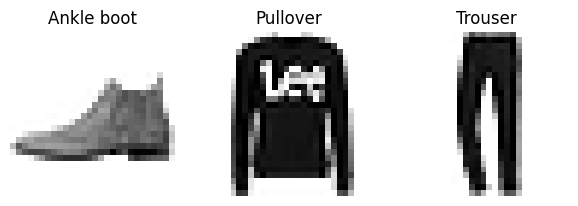

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()